**CREDIT CARD FRAUD DETECTION**

# IMPORTAR LIBRERIAS Y ECHAR UN PRIMER VISTAZO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos **492 fraudes de 284.807 transacciones**. El conjunto de datos está muy desequilibrado, **la clase positiva (fraudes) representa el 0,172%** de todas las transacciones.

- Varibles V1 a V28 son productos de PCA, debido a que no se puede proporcionar información confidencial del cliente
- La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.
- La característica 'Class' es la variable de respuesta y toma el valor **1 en caso de fraude y 0 en caso contrario.**

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# GRAFICAR

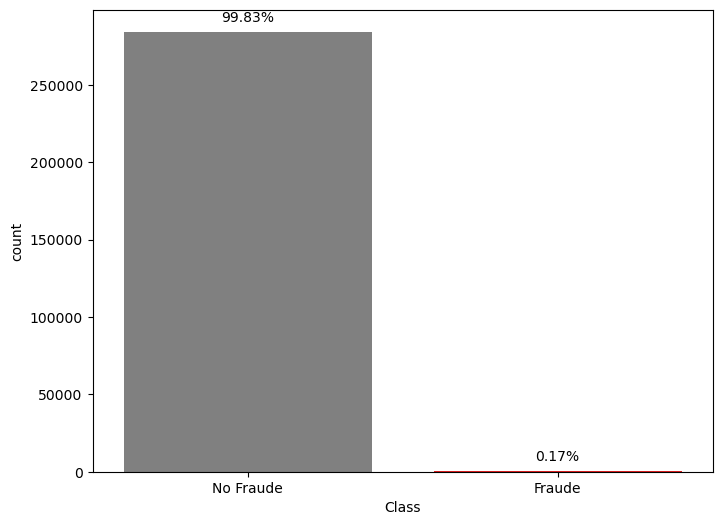

In [5]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Class',data=df,palette={0:'gray',1:'r'})
plt.xticks(ticks=[0,1],labels=['No Fraude','Fraude'])

#Añadir porcentajes
total = len(df)

for p in ax.patches:
    altura = p.get_height()
    porcentaje = altura / total *100
    ax.annotate(f"{porcentaje:.2f}%", (p.get_x() + p.get_width()/2, altura),
               ha='center',va='center',xytext=(0,10),textcoords='offset points')



plt.show()

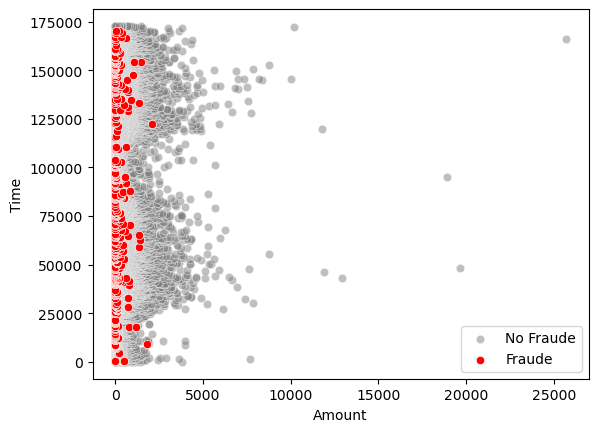

In [6]:
# Graficar puntos para cada clase con diferentes tamaños y transparencias
sns.scatterplot(x='Amount', y='Time', data=df[df['Class'] == 0], color='gray', alpha=0.5, label='No Fraude')
sns.scatterplot(x='Amount', y='Time', data=df[df['Class'] == 1], color='red', alpha=1, label='Fraude')
plt.show() 

# APLICANDO BALANCEO DE DATOS

## SMOTE y LogisticReg

**SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica de sobremuestreo que crea nuevas instancias sintéticas para la clase minoritaria en lugar de simplemente duplicarlas.

- Encuentra sus vecinos cercanos
- Genera nuevas instancias sinteticas, que estan en el medio de la linea que conecta la instancia original con uno de sus vecinos más cercanos.
-  El nuevo punto se crea tomando una proporción aleatoria entre las características de la instancia original y su vecino más cercano.
- Se repite hasta  balancear las clases

In [7]:
X = np.array(df.drop(columns=['Class']))
y = np.array(df['Class'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

Si stratify=y, entonces la proporción de la clase 0 (No Fraude) y la clase 1 (Fraude) en el conjunto de datos original se preserva tanto en el conjunto de entrenamiento como en el de prueba.

### SMOTE

In [9]:
#from imblearn import SMOTE
smote = SMOTE(random_state=123)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
from collections import Counter
# Mostrar el balance de clases antes y después de aplicar SMOTE
print('Distribución original de clases:', Counter(y_train))
print('Distribución después de SMOTE:', Counter(y_train_resampled))

Distribución original de clases: Counter({0: 199020, 1: 344})
Distribución después de SMOTE: Counter({0: 199020, 1: 199020})


### LOGISTIC REG

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled,y_train_resampled)
y_pred = model.predict(X_test)

### MATRIZ DE CONFUSION

In [12]:
def matriz_de_confusion(y_true, y_pred, title, detection):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import ConfusionMatrixDisplay
    """ Visualiza la matriz de confusión """
    
    matriz = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    #Código de matplotlib para graficar 
    from sklearn.metrics import ConfusionMatrixDisplay
    plt.figure(figsize=(4, 4))
    cm_display = ConfusionMatrixDisplay(matriz).plot()
    
    
    matriz = pd.DataFrame(matriz, 
                          columns=[f"No (0): {detection}", f"Si (1): {detection}"])
    #plt.matshow(matriz, cmap="Blues", vmin=0, vmax=20, fignum=1)
    
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    
    etiquetas = (("Verdaderos\nnegativos", "Falsos\nnegativos"),
                 ("Falsos\npositivos", "Verdaderos\npositivos"))
    
    plt.text(2.45, -0.2, title, fontsize=25, c="red")
    plt.text(2.25, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            #plt.text(i, j + 0.14, str(matriz.iloc[j, i]),
                     #fontsize=20, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()

In [13]:
len(y_test)

85443

<Figure size 400x400 with 0 Axes>

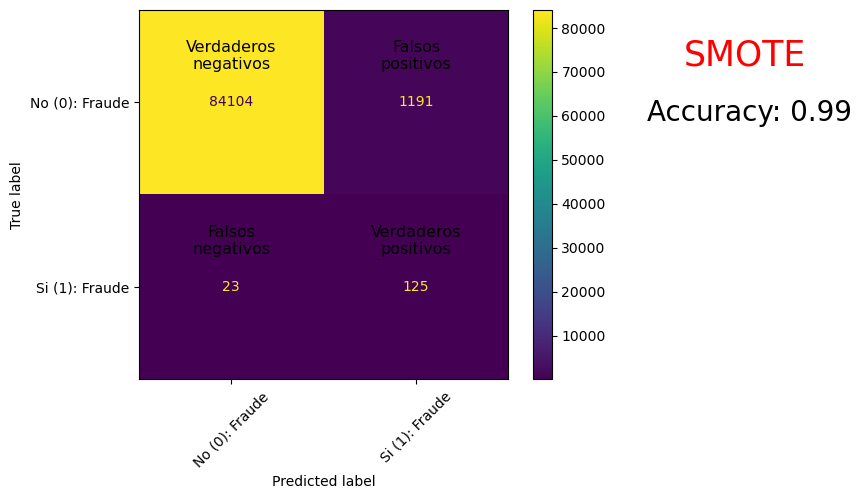

In [14]:
matriz_de_confusion(y_test,y_pred,'SMOTE','Fraude')

### REPORTE

In [15]:
report = classification_report(y_test,y_pred,target_names={0:'Normal',1:'Fraude'},output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.999727,0.986037,0.992834,85295.000000
1,0.094985,0.844595,0.170765,148.000000
accuracy,0.985792,0.985792,0.985792,0.985792
macro avg,0.547356,0.915316,0.581800,85443.000000
weighted avg,0.998159,0.985792,0.991411,85443.000000



- **Precisión de la clase 1 (Fraude) baja**: La precisión mide la proporción de predicciones positivas correctas (fraudes detectados) sobre el total de predicciones positivas. Tienes 1,191 falsos positivos y solo 125 verdaderos positivos, lo que hace que la precisión sea baja:

- **Recall de la clase 1 (Fraude) alto**: El recall mide la proporción de fraudes correctamente detectados sobre el total de fraudes reales: Esto significa que el modelo está logrando capturar la mayoría de los fraudes, pero a costa de predecir muchos falsos positivos.

### CURVA ROC Y AUC

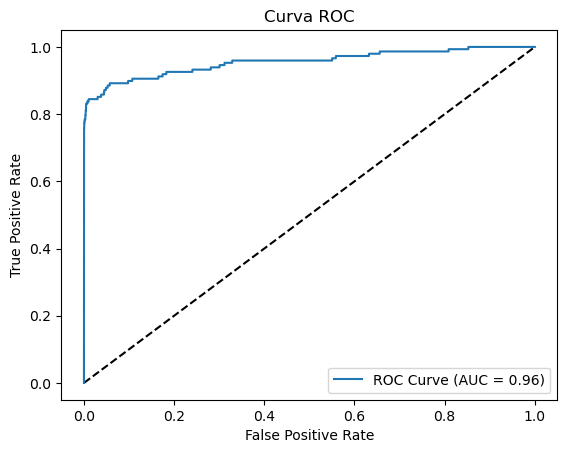

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_proba)
auc = roc_auc_score(y_test,y_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')

- Los indican que el modelo tiene un AUC muy bueno (0.96), lo que significa que **es excelente a la hora de separar las dos clases (fraude y no fraude)** basándose en las probabilidades. **Sin embargo, el F1-Score para la clase 1 (fraude) es muy bajo (0.17)**, mientras que para la clase 0 (no fraude) es casi perfecto (0.99). Esto sugiere que, aunque el modelo puede identificar bien la clase mayoritaria (no fraude), **no está funcionando bien para detectar fraudes.**

## USAR LOGISTIC BALANCED

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

<Figure size 400x400 with 0 Axes>

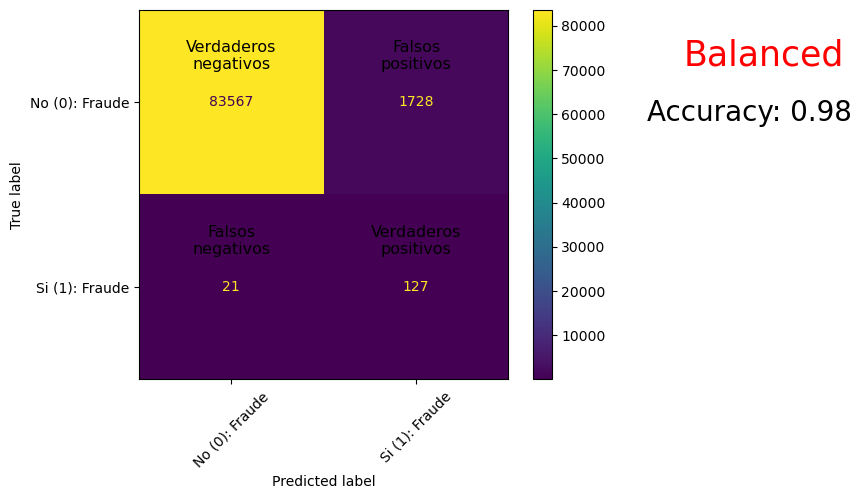

In [18]:
matriz_de_confusion(y_test,y_pred,"Balanced",'Fraude')

In [19]:
report = classification_report(y_test,y_pred,target_names={0:'Normal',1:'Fraude'},output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.999749,0.979741,0.989644,85295.00000
1,0.068464,0.858108,0.126810,148.00000
accuracy,0.979530,0.979530,0.979530,0.97953
macro avg,0.534106,0.918925,0.558227,85443.00000
weighted avg,0.998136,0.979530,0.988149,85443.00000


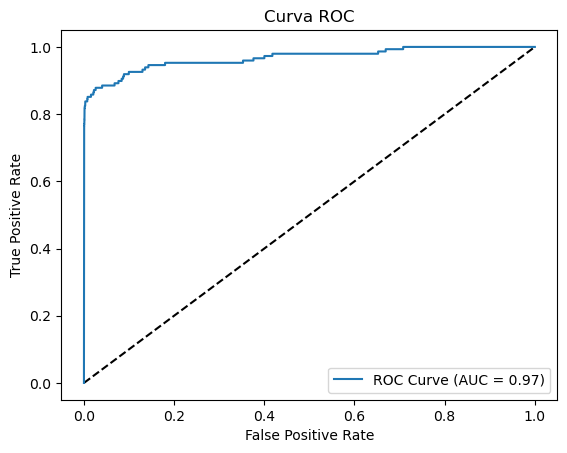

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_proba)
auc = roc_auc_score(y_test,y_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')

In [21]:
from scipy.stats import randint
randint(100, 500)

## RandomForestClassifier

In [42]:
import time
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__class_weight': ['balanced'],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

start_time = time.time()

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=3, random_state=123)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__class_weight': ['balanced'],
                                        'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200,
                                                                                 300]},
                   random_state=123, verbose=3)

In [43]:
# Calcular el tiempo total
total_time = time.time() - start_time
print(f"Tiempo total: {total_time:.2f} segundos")

Tiempo total: 1710.29 segundos


In [44]:
# Obtener el mejor modelo y los mejores parámetros
best_model = random_search.best_estimator_
best_params = random_search.best_params_

In [45]:
print("Mejores parámetros:", best_params)

Mejores parámetros: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': 'balanced'}


In [46]:
print(f'Mejor score: {random_search.best_score_}')

Mejor score: 0.9995736448174799


# ENTRENANDO CON LOS MEJORES PARAMETROS

In [47]:
best_model

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=20,
                                        min_samples_split=5,
                                        n_estimators=200))])

In [48]:
best_params

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__class_weight': 'balanced'}

- **n_estimators:** Este parámetro determina el número de árboles en el bosque. Un mayor número de árboles puede mejorar la capacidad del modelo para generalizar al reducir la varianza, pero también aumenta el tiempo de entrenamiento y la complejidad.
- **min_samples_split:** Define el número mínimo de muestras necesarias para dividir un nodo interno en un árbol.
- **min_samples_leaf:** Establece el número mínimo de muestras que debe tener un nodo hoja. (Un valor más alto puede hacer que el modelo sea más robusto al reducir la varianza, pero puede llevar a una mayor sesgo. )
- **max_depth:** Define la profundidad máxima de cada árbol en el bosque. Limitar la profundidad puede ayudar a prevenir el sobreajuste, ya que restringe la capacidad del modelo para aprender detalles específicos del conjunto de entrenamiento.
- **criterion:** Este parámetro especifica la función que se utilizará para medir la calidad de una división en los árboles. Los valores típicos son: 'gini': Utiliza el índice de **Gini** para medir la impureza de los nodos y **'entropy':** Utiliza la entropía (o ganancia de información) para medir la calidad de las divisiones.


- **Índice de Gini:** Mide la impureza de un nodo en un árbol de decisión. Penaliza las mezclas de clases, ya que un valor de Gini más alto indica que las instancias en el nodo están más mezcladas entre diferentes clases. Un Gini de 0 significa que el nodo es puro (todas las instancias son de la misma clase).

    - **Ventajas:** Es computacionalmente más simple que la entropía. Tiende a funcionar bien en la práctica para muchos problemas de clasificación


- **Entropía:** Mide la incertidumbre o impureza de un nodo. Penaliza la mezcla de clases en función de la cantidad de información necesaria para describir la clase. Un valor de entropía más alto indica mayor mezcla de clases, y un valor de 0 significa que el nodo es puro.

  - **Ventajas:** Tiene una interpretación más directa en términos de teoría de la información. 
      Puede ofrecer mejores resultados en algunos problemas, especialmente cuando se busca una separación más fina entre clases.

In [49]:
y_pred = best_model.predict(X_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Matriz de confusion

<Figure size 400x400 with 0 Axes>

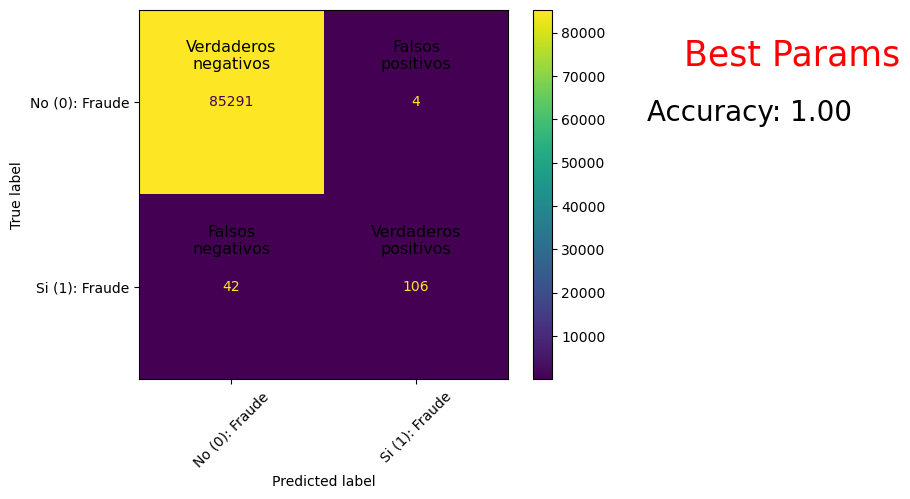

In [51]:
matriz_de_confusion(y_test,y_pred,'Best Params','Fraude')

## Reporte

In [52]:
report = classification_report(y_test,y_pred,target_names=['No Fraude','Fraude'],output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [53]:
report_df

,precision,recall,f1-score,support
No Fraude,0.999508,0.999953,0.999730,85295.000000
Fraude,0.963636,0.716216,0.821705,148.000000
accuracy,0.999462,0.999462,0.999462,0.999462
macro avg,0.981572,0.858085,0.910718,85443.000000
weighted avg,0.999446,0.999462,0.999422,85443.000000


**CLASE NO FRAUDE**
- **Precision: 0.9995 → Muy alta**, lo que significa que casi todas las predicciones como "No Fraude" fueron correctas.
- **Recall: 0.9996 → También muy alto**, indicando que el modelo captura casi todos los casos verdaderos de "No Fraude".

**CLASE FRAUDE**
- **Precision: 0.9636 → Muy buena para una clase minoritaria**, lo que significa que la mayoría de las predicciones etiquetadas como "Fraude" son correctas.
- **Recall: 0.7162 → No es tan alto como la precisión**, lo que indica que el modelo pierde algunos casos de fraude (falsos negativos).
- **F1-score: 0.8217 → Es un buen equilibrio entre precisión y recall**, pero esto sugiere que aún hay margen de mejora en la captura de fraudes (recall).

## CURVA ROC Y VALOR AUC

In [58]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

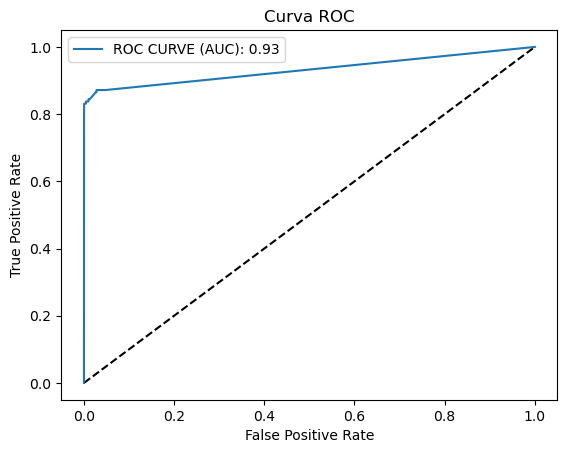

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f"ROC CURVE (AUC): {auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

## Ajustando el Umbral (Clase 1: Fraude)

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Diferentes umbrales para probar
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)  # Ajustar el umbral
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    print(f"Threshold: {threshold}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

Threshold: 0.1, Precision: 0.8000, Recall: 0.8108, F1: 0.8054
Threshold: 0.2, Precision: 0.8923, Recall: 0.7838, F1: 0.8345
Threshold: 0.3, Precision: 0.9113, Recall: 0.7635, F1: 0.8309
Threshold: 0.4, Precision: 0.9237, Recall: 0.7365, F1: 0.8195
Threshold: 0.5, Precision: 0.9636, Recall: 0.7162, F1: 0.8217
Threshold: 0.6, Precision: 0.9714, Recall: 0.6892, F1: 0.8063
Threshold: 0.7, Precision: 0.9794, Recall: 0.6419, F1: 0.7755
Threshold: 0.8, Precision: 0.9773, Recall: 0.5811, F1: 0.7288
Threshold: 0.9, Precision: 0.9863, Recall: 0.4865, F1: 0.6516


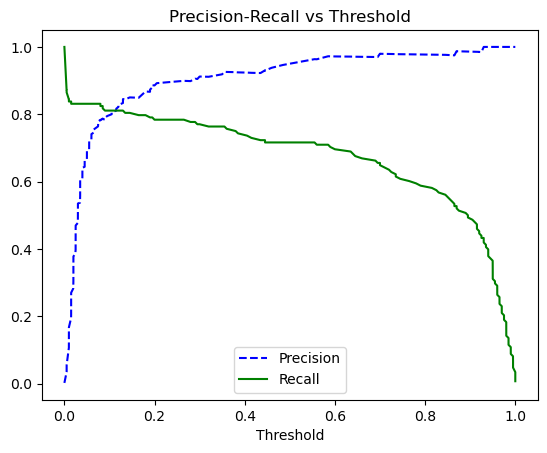

In [78]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.title('Precision-Recall vs Threshold')
plt.show()

# CONCLUSIONES

**El objetivo principal es maximizar la detección de fraudes (priorizando el recall)**, un umbral alrededor de 0.1 podría ser una buena elección. Aunque la precisión es relativamente baja (80%), el recall es el más alto (81.08%), capturando la mayoría de los fraudes **a costa de aumentar los falsos positivos.**

**Para un balance entre precisión y recall**, el umbral de 0.2 o 0.3 parece proporcionar un buen equilibrio. Con un F1-score de aproximadamente 0.83 y una precisión por encima del 89%, estos umbrales podrían ser más apropiados si deseas mantener una buena precisión sin sacrificar demasiado el recall.

**Evalúa el impacto operativo de los falsos positivos** en tu aplicación. Si los **costos asociados con los falsos positivos** (como la inspección manual) son manejables, podrías optar por un umbral más bajo para asegurar una detección más exhaustiva de fraudes.

**PASO FINAL**

Se puede **probar estos umbrales en una fase piloto** para observar el impacto práctico de los ajustes en el entorno de producción. También sería útil visualizar la curva Precision-Recall para estos umbrales y observar gráficamente el trade-off.